<a href="https://colab.research.google.com/github/tiwars10/Analytics/blob/master/facebookprophet_timeseries_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings

In [0]:
import pandas as pd

In [0]:
from matplotlib import pyplot as plt
import collections
import warnings
import pandas_profiling
import numpy as np


In [0]:
import itertools

In [0]:
import seaborn as sns

In [0]:
import scipy

In [0]:
%matplotlib inline

In [0]:
from matplotlib.pylab import rcParams

In [0]:
import statsmodels.api as sm

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
from sklearn import metrics

In [0]:
from pmdarima import auto_arima

In [0]:
warnings.filterwarnings('ignore')

In [0]:
from fbprophet import Prophet

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [0]:
flight_data=sns.load_dataset("flights")

In [0]:
flight_data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
 flight_data.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [0]:
flight_data.shape

(144, 3)

In [0]:
flight_data.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [0]:
flight_data.info

<bound method DataFrame.info of      year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
5    1949       June         135
6    1949       July         148
7    1949     August         148
8    1949  September         136
9    1949    October         119
10   1949   November         104
11   1949   December         118
12   1950    January         115
13   1950   February         126
14   1950      March         141
15   1950      April         135
16   1950        May         125
17   1950       June         149
18   1950       July         170
19   1950     August         170
20   1950  September         158
21   1950    October         133
22   1950   November         114
23   1950   December         140
24   1951    January         145
25   1951   February         150
26   1951      March         178
27   1951      April         163
28   1951  

In [0]:
flight_data=flight_data.loc[:,['passengers']]

In [0]:
flight_data.head()

,passengers
0,112
1,118
2,132
3,129
4,121


In [0]:
month=pd.date_range('19490101',periods=144,freq='M')

In [0]:
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [0]:
flight_data['ds']=month

In [0]:
flight_data.head()
flight_data.dtypes

,passengers,ds
0,112,1949-01-31
1,118,1949-02-28
2,132,1949-03-31
3,129,1949-04-30
4,121,1949-05-31


passengers             int64
ds            datetime64[ns]
dtype: object

In [0]:
data=data.rename(columns={"passengers":"y"})
data=data.sort_index(axis=1)
data.head()

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [0]:
my_forecast=Prophet(interval_width=0.95)

In [0]:
my_forecast.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
forecast_periods=my_forecast.make_future_dataframe(periods=36,include_history=True,freq='M')

In [0]:
forecast_periods

,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
5,1949-06-30
6,1949-07-31
7,1949-08-31
8,1949-09-30
9,1949-10-31


In [0]:
forecast=my_forecast.predict(forecast_periods)

In [0]:
forecast1=forecast.loc[:,['ds','yhat']]

In [0]:
forecast1.head()

,ds,yhat
0,1949-01-31,85.240273
1,1949-02-28,77.585537
2,1949-03-31,110.948382
3,1949-04-30,108.547569
4,1949-05-31,111.819264


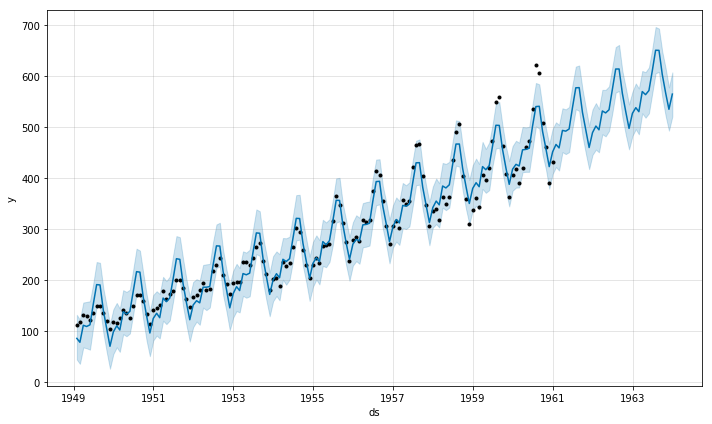

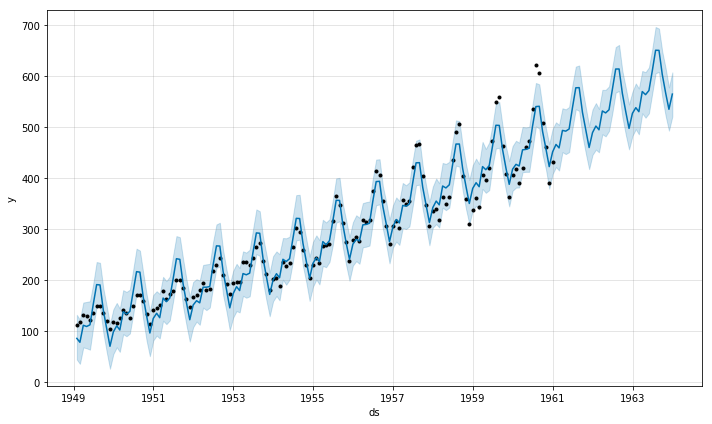

In [0]:
my_forecast.plot(forecast,uncertainty=True)

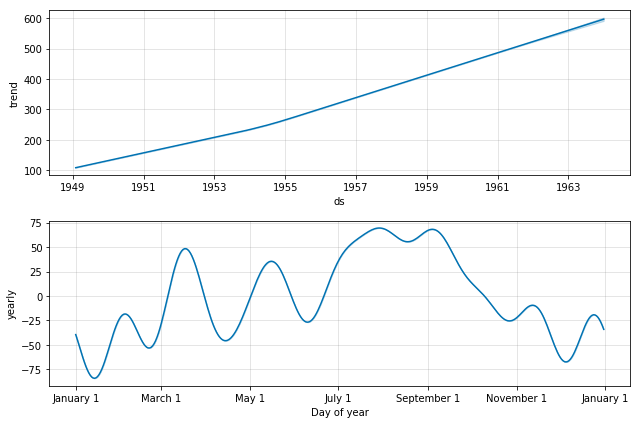

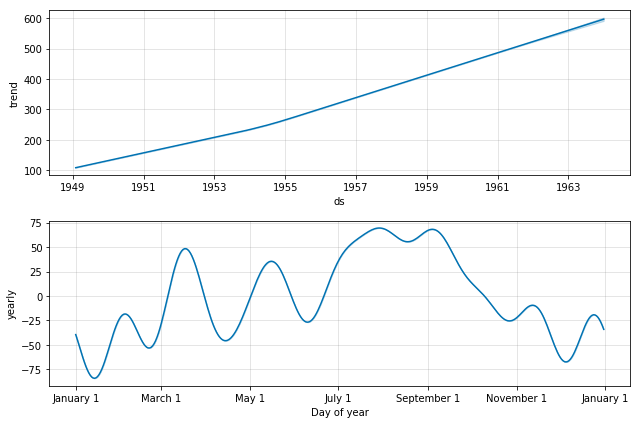

In [0]:
my_forecast.plot_components(forecast)

In [0]:
final_df=pd.merge(forecast1,data,on='ds',how='inner')
final_df.head()

,ds,yhat,y
0,1949-01-31,85.240273,112
1,1949-02-28,77.585537,118
2,1949-03-31,110.948382,132
3,1949-04-30,108.547569,129
4,1949-05-31,111.819264,121


In [0]:
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df.yhat,final_df.y),0)

17.0

In [0]:
data.head()

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [0]:
data.y=np.log(data.y)
data.head(5)

,ds,y
0,1949-01-31,4.718499
1,1949-02-28,4.770685
2,1949-03-31,4.882802
3,1949-04-30,4.859812
4,1949-05-31,4.795791


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
0,1949-01-31
1,1949-02-28
2,1949-03-31
3,1949-04-30
4,1949-05-31
5,1949-06-30
6,1949-07-31
7,1949-08-31
8,1949-09-30
9,1949-10-31


,ds,yhat
0,1949-01-31,4.710721
1,1949-02-28,4.709836
2,1949-03-31,4.834695
3,1949-04-30,4.816443
4,1949-05-31,4.815402


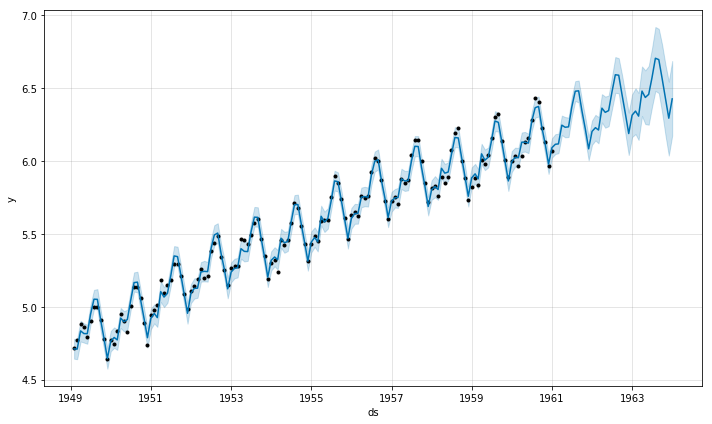

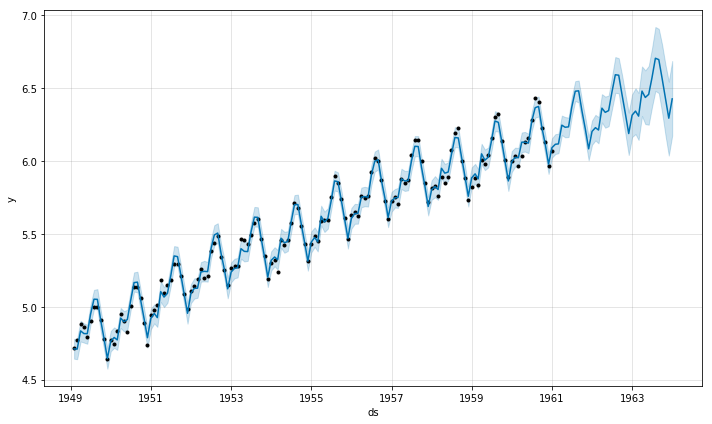

In [0]:
my_forecast=Prophet(interval_width=0.95)
my_forecast.fit(data)
forecast_periods=my_forecast.make_future_dataframe(periods=36,include_history=True,freq='M')
forecast_periods
forecast=my_forecast.predict(forecast_periods)
forecast1=forecast.loc[:,['ds','yhat']]
forecast1.head()
my_forecast.plot(forecast,uncertainty=True)


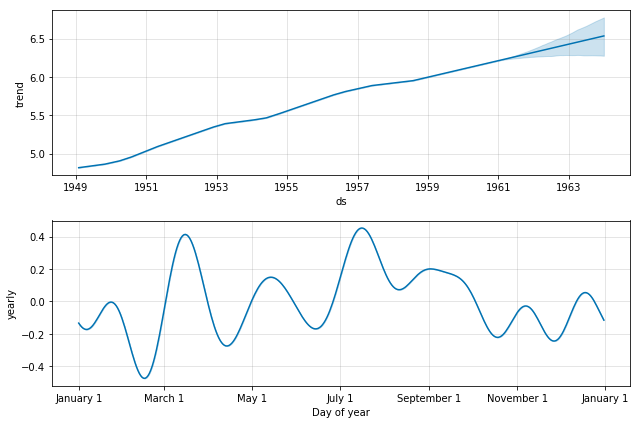

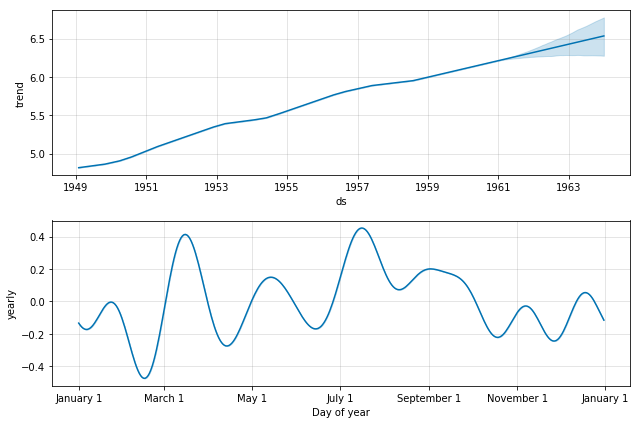

In [0]:
my_forecast.plot_components(forecast)

In [0]:
final_df1=pd.merge(forecast1,data,on='ds',how='inner')
final_df1.head()

,ds,yhat,y
0,1949-01-31,4.710721,4.718499
1,1949-02-28,4.709836,4.770685
2,1949-03-31,4.834695,4.882802
3,1949-04-30,4.816443,4.859812
4,1949-05-31,4.815402,4.795791


In [0]:
final_df1.yhat=np.e**(final_df1.yhat)
final_df1.y=np.e**(final_df1.y)
final_df1.head()

,ds,yhat,y
0,1949-01-31,111.132216,112.0
1,1949-02-28,111.033940,118.0
2,1949-03-31,125.800197,132.0
3,1949-04-30,123.524950,129.0
4,1949-05-31,123.396403,121.0


In [0]:
import numpy as np
from sklearn import metrics
np.round(metrics.mean_absolute_error(final_df1.yhat,final_df1.y),0)

7.0

In [0]:
final_df1.head()
final_df1.tail()

,ds,yhat,y
0,1949-01-31,111.132216,112.0
1,1949-02-28,111.033940,118.0
2,1949-03-31,125.800197,132.0
3,1949-04-30,123.524950,129.0
4,1949-05-31,123.396403,121.0


,ds,yhat,y
139,1960-08-31,587.332969,606.0
140,1960-09-30,509.507243,508.0
141,1960-10-31,452.975816,461.0
142,1960-11-30,395.291502,390.0
143,1960-12-31,442.624606,432.0


In [0]:
forecast2=forecast.loc[144:,['ds','yhat','yhat_lower','yhat_upper']]
forecast2.yhat=np.e**(forecast2.yhat)
forecast2.yhat_lower=np.e**(forecast2.yhat_lower)
forecast2.yhat_upper=np.e**(forecast2.yhat_upper)
np.round(forecast2,0)

,ds,yhat,yhat_lower,yhat_upper
144,1961-01-31,453.0,424.0,486.0
145,1961-02-28,454.0,426.0,487.0
146,1961-03-31,517.0,483.0,552.0
147,1961-04-30,509.0,475.0,546.0
148,1961-05-31,511.0,476.0,544.0
149,1961-06-30,586.0,549.0,628.0
150,1961-07-31,652.0,610.0,699.0
151,1961-08-31,654.0,604.0,702.0
152,1961-09-30,570.0,530.0,614.0
153,1961-10-31,503.0,466.0,544.0


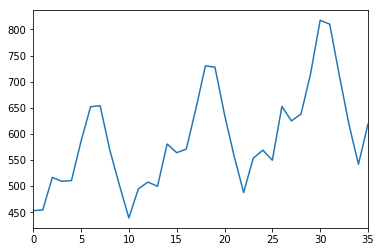

In [0]:
sns.tsplot(forecast2.yhat)
plt.show()